**By: Zamzam Alsarayrah**

## Imports libraries 

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import Logistic Regression model.
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# Import metrics.
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

## Read Data

In [198]:
# Read in train data.
train = pd.read_csv('./data/train.csv')

In [199]:
# Read in test data.
test = df = pd.read_csv('./data/test.csv')

In [200]:
# Check out first five rows.
train.head()

Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9       D10       D11     D12       D13       D14  \
0  0.585445  0.743663  0.243144  0.187856  0.0000  0.000000  0.069000   
1  0.411754  0.836582  0.106480  0.101382  0.1875  0.193548  0.131001   
2  0.517720  0.679051  0.352308  0.193548  0.1250  0.000000  0.068900   
3  0.288764  0.805110  0.208989  0.000000  0.0000  0.000000  0.145947   
4  0.303809  0.812646  0.125177  0.532258  0.0000  0.000000  0.094900   

        D15       D16       D17       D18       D19       D20      D21  \
0  0.362012  0.301773  0.597930  0.190813  0.107219  0.070500  0.00717   
1  0.350206  0.187419  0.762669  0.180473  0.329962  0.107681  0.01950   
2  0.574628  0.283327  0.510633  0.184480  0.073300  0.061600  0.00566   
3  0.584688  0.325247  0.496745  0.242288  0.087700  0.075300  0.01680   
4  0.540323  0.116775  0.552982  0.167897  0.116140  0.054200  0.01350   

        D22  D23   D24       D25       D26  D27  D28       D29       D30  \
0  0.137931    1  0.00  0.496683  0.753131    1    1  0.000000  0.262919   
1  0.206897    0  0.75  0.449869  0.720484    0    0  0.666667  0.099400   
2  0.000000    1  0.00  0.486610  0.803577    0    1  0.000000  0.428659   
3  0.000000    1  0.00  0.459122  0.829482    0    1  0.000000  0.435410   
4  0.103448    1  0.00  0.381883  0.913374    0    1  0.000000  0.305333   

        D31       D32       D33      D34       D35  D36  D37       D38  \
0  0.077200  0.082700  0.200590  0.00000  0.000000  0.0  0.0  0.162383   
1  0.289240  0.216710  0.100295  0.16958  0.235294  0.0  0.0  0.119104   
2  0.032400  0.072400  0.000000  0.03930  0.000000  0.0  0.0  0.076100   
3  0.118562  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.068900   
4  0.054100  0.170822  0.000000  0.00000  0.176471  0.0  0.0  0.019900   

        D39       D40  D41  D42       D43       D44       D45       D46  \
0  0.150153  0.000000  0.0  0.0  0.000000  0.092000  0.057300  0.426576   
1  0.075100  0.000000  0.0  0.0  0.199919  0.312883  0.276016  0.647681   
2  0.225229  0.000000  0.0  0.0  0.066600  0.000000  0.079100  0.298171   
3  0.000000  0.148444  0.0  0.0  0.000000  0.000000  0.000000  0.402020   
4  0.057400  0.000000  0.0  0.0  0.000000  0.161189  0.312830  0.707479   

        D47       D48       D49       D50  D51       D52       D53     D54  \
0  0.234822  0.050200  0.000000  0.833333    0  1.000000  0.121520  0.0000   
1  0.286386  0.324514  0.156568  1.000000    0  0.578947  0.268620  0.0634   
2  0.212155  0.051200  0.000000  0.750000    1  1.000000  0.000000  0.0211   
3  0.122696  0.000000  0.000000  0.000000    0  1.000000  0.000000  0.0000   
4  0.089500  0.088000  0.117426  1.000000    0  1.000000  0.140657  0.0000   

        D55       D56       D57       D58  D59     D60       D61      D62  \
0  0.000000  0.000000  0.035100  0.133438  0.0  0.0000  0.011700  0.00000   
1  0.190839  0.000000  0.368455  0.191837  0.0  0.0689  0.175271  0.28171   
2  0.063900  0.000000  0.017600  0.000000  0.0  0.0275  0.070900  0.07180   
3  0.000000  0.149531  0.000000  0.000000  0.0  0.0294  0.137096  0.00000   
4  0.000000  0.187500  0.000000  0.000000  0.0  0.0294  0.070900  0.00000   

        D63  D64       D65       D66       D67       D68       D69       D70  \
0  0.000000  0.0  0.034600  0.027100  0.361513  0.000000  0.075300  0.611301   
1  0.254301  0.0  0.362117  0.161739  0.161839  0.051000  0.268761  0.806448   
2  0.000000  0.0  0.017300  0.000000  0.156408  0.069700  0.024700  0.517376   
3  0.000000  0.0  0.000000  0.000000  0.027900  0.149531 

In [201]:
# Check out first five rows.
test.head()

D1        D2    D3   D4        D5        D6        D7        D8  \
0  0.366667  0.611765  0.05  0.0  0.110435  0.803973  0.106075  0.473965   
1  0.100000  0.758175  0.30  0.0  0.180128  0.621378  0.287144  0.503919   
2  0.100000  0.658812  0.10  0.0  0.243421  0.640959  0.312765  0.279784   
3  0.100000  0.655752  0.10  0.0  0.226978  0.776996  0.150657  0.336948   
4  0.000000  0.484851  0.00  0.0  0.561200  0.771463  0.244287  0.293096   

         D9       D10       D11     D12  D13       D14       D15       D16  \
0  0.835617  0.106452  0.103855  0.1875  0.0  0.135949  0.350206  0.187419   
1  0.674919  0.403616  0.125237  0.0625  0.0  0.183958  0.359572  0.372014   
2  0.686775  0.280301  0.266129  0.0625  0.0  0.122230  0.586479  0.227994   
3  0.802121  0.125608  0.118280  0.0625  0.0  0.126692  0.527341  0.122608   
4  0.717575  0.230842  0.000000  0.0000  0.0  0.443063  0.546064  0.401079   

        D17       D18       D19       D20      D21       D22  D23   D24  \
0  0.756282  0.201911  0.316854  0.104583  0.01870  0.241379    0  0.75   
1  0.508107  0.276535  0.101973  0.049800  0.00548  0.137931    1  0.00   
2  0.368400  0.107220  0.043600  0.068400  0.00776  0.034500    1  0.00   
3  0.530575  0.159911  0.071800  0.042500  0.00589  0.034500    1  0.00   
4  0.415092  0.003930  0.112314  0.071400  0.00663  0.000000    1  0.00   

        D25       D26  D27  D28       D29       D30       D31       D32  \
0  0.423439  0.732260    0    0  0.666667  0.096500  0.199044  0.190843   
1  0.360849  0.701909    1    1  0.166667  0.168664  0.031100  0.050400   
2  0.367166  0.917836    0    1  0.000000  0.510178  0.032400  0.052700   
3  0.396976  0.896885    1    1  0.000000  0.495344  0.110121  0.099100   
4  0.474608  0.809131    0    1  0.000000  0.184156  0.000000  0.010300   

        D33      D34       D35     D36       D37      D38       D39     D40  \
0  0.187285  0.16958  0.294118  0.0000  0.000000  0.04800  0.150153  0.0000   
1  0.200590  0.00000  0.242456  0.0958  0.220103  0.00923  0.000000  0.0000   
2  0.000000  0.00000  0.058800  0.0000  0.000000  0.07650  0.000000  0.0000   
3  0.000000  0.00000  0.058800  0.0000  0.000000  0.03990  0.000000  0.0637   
4  0.000000  0.00000  0.000000  0.0620  0.307492  0.00000  0.000000  0.0000   

        D41     D42       D43       D44       D45       D46       D47  \
0  0.000000  0.0000  0.199919  0.349294  0.325514  0.632651  0.284219   
1  0.075300  0.0000  0.077600  0.234708  0.562055  0.649946  0.124874   
2  0.041600  0.0823  0.000000  0.000000  0.217509  0.453872  0.095200   
3  0.000000  0.0000  0.000000  0.053700  0.132286  0.691904  0.074300   
4  0.315789  0.0877  0.000000  0.000000  0.318993  0.250248  0.147001   

        D48       D49  D50  D51       D52       D53       D54       D55  \
0  0.344392  0.195710  1.0    1  0.567568  0.295189  0.063400  0.190839   
1  0.187824  0.242498  1.0    0  1.000000  0.121520  0.213461  0.000000   
2  0.042200  0.039100  1.0    0  0.000000  0.000000  0.000000  0.068500   
3  0.029300  0.039100  1.0    0  1.000000  0.046900  0.011200  0.017300   
4  0.045000  0.089300  1.0    0  0.000000  0.000000  0.057700  0.027700   

        D56       D57       D58  D59     D60       D61      D62       D63  \
0  0.062500  0.368455  0.066700  0.0  0.0689  0.093200  0.28171  0.286807   
1  0.152126  0.000000  0.033600  0.0  0.0000  0.018800  0.04990  0.113788   
2  0.055100  0.000000  0.127086  0.0  0.0000  0.070900  0.00000  0.081200   
3  0.182122  0.000000  0.069700  0.0  0.0588  0.000000  0.00000  0.108664   
4  0.000000  0.000000  0.000000  0.0  0.0000  0.222797  0.00000  0.236631   

        D64       D65       D66       D67       D68       D69       D70  \
0  0.000000  0.333675  0.161739  0.187907  0.113461  0.284669  0.801249   
1  0.166667  0.000000  0.081600  0.149348  0.000000  0.216452  0.611301   
2  0.083800  0.000000  0.000000  0.000000  0.055100  0.065000  0.299110   
3  0.078900  0.035100  0.000000  0.055800  0.110146  

In [202]:
#check how many columns and rows I have in both train and test
train.shape, test.shape

((3751, 1777), (2501, 1776))

# EDA 

- Check for Missing values
- Check name of columns
- Find categorical and numerical columns

### check the null value TRAIN

<AxesSubplot:>

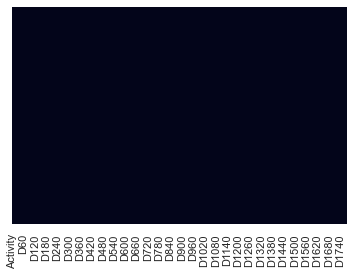

In [203]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [204]:
# check the null value TRAIN
train.isnull().sum().sum()

0

### check the null value TEST

<AxesSubplot:>

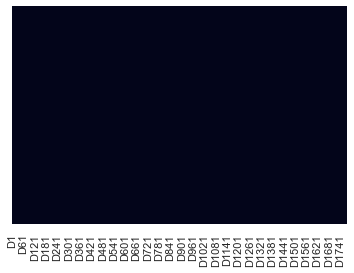

In [205]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

In [206]:
# check the null value TEST
test.isnull().sum().sum()

0

### Data type for each train and test 

In [207]:
# check the dtype on TRAIN
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [208]:
# check the dtype on TEST
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Columns: 1776 entries, D1 to D1776
dtypes: float64(935), int64(841)
memory usage: 33.9 MB


In [209]:
# select the float columns TRAIN
df_float = train.select_dtypes(include=[np.float])
print("Float Columns",df_float.columns)

# select int columns TRIAN
df_int = train.select_dtypes(include=[np.int])
print("Int columns",df_int.columns)

Float Columns Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       ...
       'D942', 'D943', 'D944', 'D945', 'D946', 'D947', 'D948', 'D949', 'D950',
       'D951'],
      dtype='object', length=942)
Int columns Index([], dtype='object')


In [210]:
# select the float columns TEST
df_float = train.select_dtypes(include=[np.float])
print("Float Columns",df_float.columns)

# select int columns TEST
df_int = train.select_dtypes(include=[np.int])
print("Int columns",df_int.columns)

Float Columns Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       ...
       'D942', 'D943', 'D944', 'D945', 'D946', 'D947', 'D948', 'D949', 'D950',
       'D951'],
      dtype='object', length=942)
Int columns Index([], dtype='object')


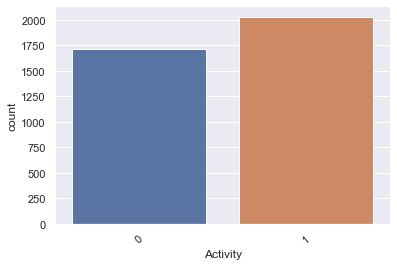

In [211]:
# creat sns for our target
Act = sns.countplot(x=train["Activity"])
    
Act.set_xticklabels(Act.get_xticklabels(),rotation=40)
plt.show()

In [212]:
# check our target
train['Activity'].value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

## Find most important features relative to target

In [213]:
# find the most correlated columns:
train_corr = abs(train.corr()).sort_values(by='Activity', ascending=False)[['Activity']]
train_corr[train_corr['Activity']>0.10]

Activity
Activity  1.000000
D27       0.472340
D469      0.268601
D217      0.233387
D182      0.228664
...            ...
D1447     0.101093
D1150     0.100573
D610      0.100473
D161      0.100259
D1333     0.100090

[153 rows x 1 columns]

In [214]:
train.shape

(3751, 1777)

In [215]:
train_final = train[train_corr[train_corr['Activity']>0.10].index.tolist()]
train_final.shape

(3751, 153)

**Now we decreased the number of predictors from 1777 to 153.**

<AxesSubplot:>

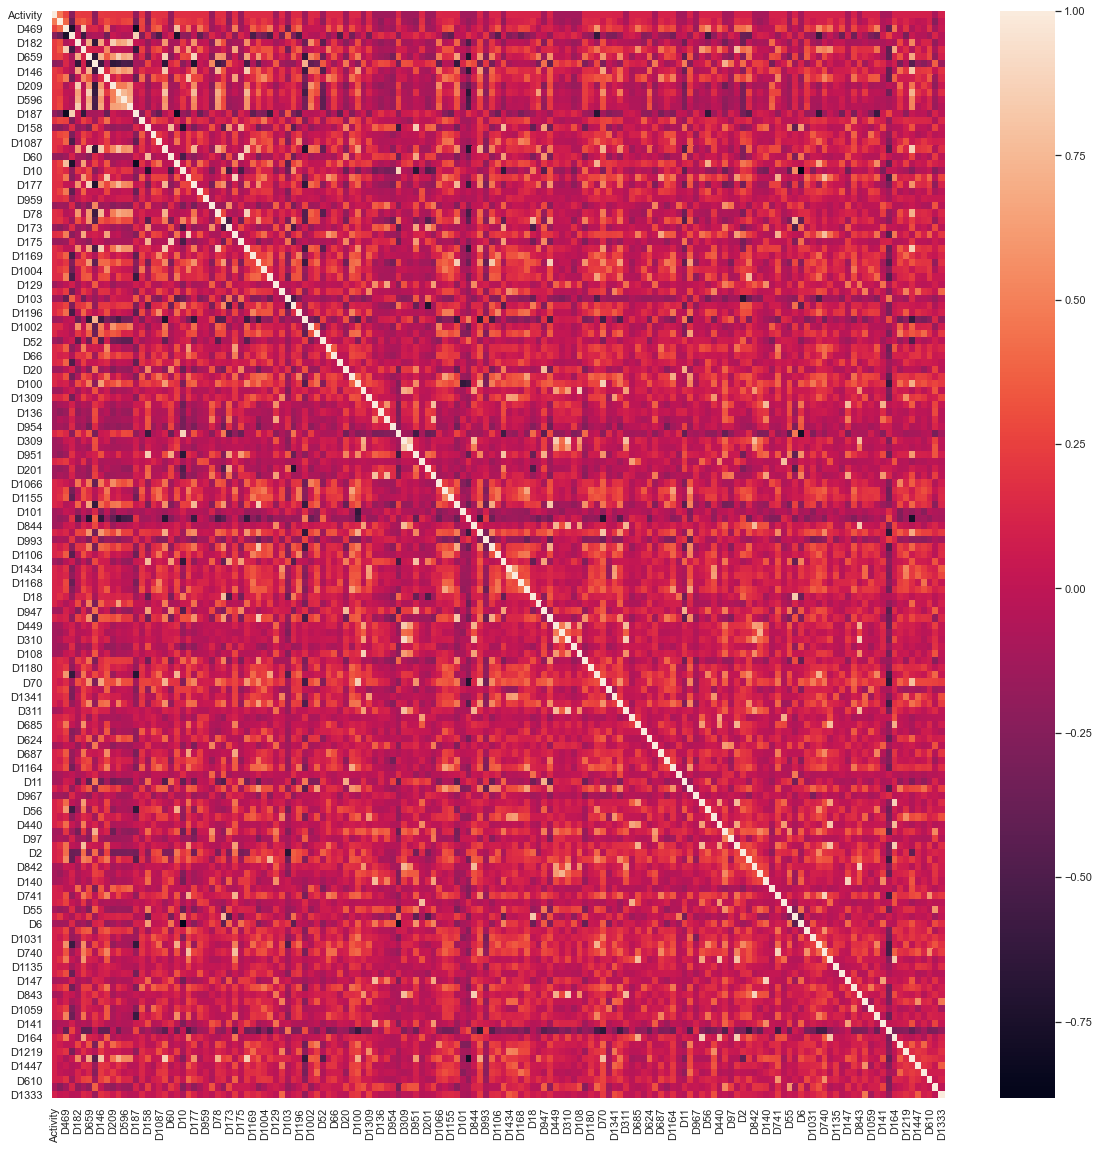

In [216]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_final.abs().corr())

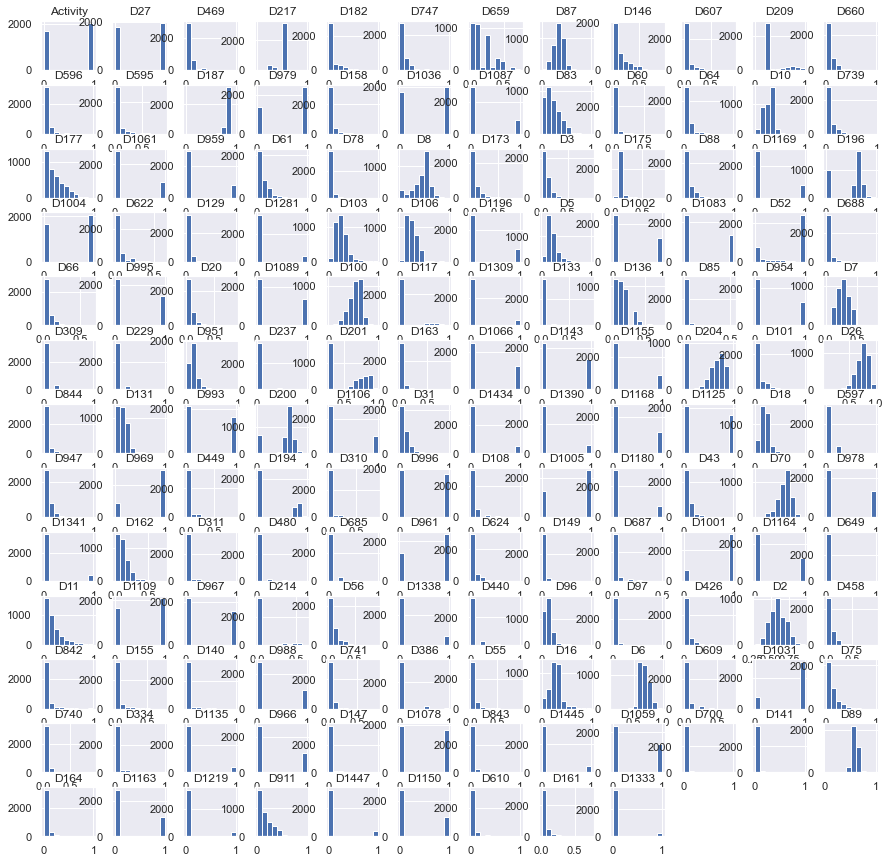

In [217]:
train_final.hist(figsize=(15, 15));

In [218]:
train_final.columns

Index(['Activity', 'D27', 'D469', 'D217', 'D182', 'D747', 'D659', 'D87',
       'D146', 'D607',
       ...
       'D89', 'D164', 'D1163', 'D1219', 'D911', 'D1447', 'D1150', 'D610',
       'D161', 'D1333'],
      dtype='object', length=153)

In [219]:
pd.set_option('display.max_columns', None)
train_final.head()

Activity  D27  D469      D217    D182  D747   D659       D87     D146  \
0         1    1   0.0  0.539308  0.0943   0.0  0.250  0.307537  0.00000   
1         1    0   0.0  0.539308  0.0943   0.0  0.250  0.433171  0.47619   
2         1    0   0.0  0.539308  0.0943   0.0  0.125  0.351472  0.00000   
3         1    0   0.0  0.539308  0.0943   0.0  0.000  0.296236  0.00000   
4         0    0   0.0  0.539308  0.0943   0.0  0.000  0.459514  0.00000   

       D607      D209      D660  D596  D595      D187  D979      D158  D1036  \
0  0.142857  0.296798  0.057100   0.0   0.0  0.836962     1  0.000000      1   
1  0.000000  0.296798  0.171429   0.0   0.0  0.836962     0  0.177778      0   
2  0.000000  0.296798  0.028600   0.0   0.0  0.836962     0  0.000000      0   
3  0.000000  0.296798  0.000000   0.0   0.0  0.836962     1  0.088900      0   
4  0.000000  0.296798  0.000000   0.0   0.0  0.836962     0  0.111111      0   

   D1087       D83     D60  D64       D10    D739      D177  D1061  D959  \
0      0  0.222222  0.0000  0.0  0.243144  0.0909  0.422166      0     1   
1      0  0.555556  0.0689  0.0  0.106480  0.0455  0.116852      0     0   
2      0  0.111111  0.0275  0.0  0.352308  0.0000  0.256351      0     0   
3      0  0.111111  0.0294  0.0  0.208989  0.0000  0.000514      0     0   
4      0  0.000000  0.0294  0.0  0.125177  0.0000  0.000514      0     0   

        D61      D78        D8      D173    D3      D175      D88  D1169  \
0  0.011700  0.01350  0.585445  0.000000  0.10  0.142939  0.06940      0   
1  0.175271  0.07430  0.411754  0.141794  0.05  0.090300  0.29509      1   
2  0.070900  0.00676  0.517720  0.053000  0.00  0.103358  0.04840      0   
3  0.137096  0.00676  0.288764  0.000000  0.00  0.209811  0.05350      0   
4  0.070900  0.00000  0.303809  0.062600  0.00  0.105755  0.05350      0   

       D196  D1004      D622    D129  D1281      D103      D106  D1196  \
0  0.610682      1  0.000000  0.0000      0  0.343913  0.223825      0   
1  0.742307      0  0.263158  0.0526      0  0.194331  0.235578      0   
2  0.565206      0  0.000000  0.0000      0  0.279384  0.191390      0   
3  0.000000      1  0.000000  0.0000      0  0.614473  0.140644      0   
4  0.000000      1  0.000000  0.0000      0  0.221730  0.140030      0   

         D5  D1002  D1083       D52  D688       D66  D995       D20  D1089  \
0  0.132956      1      0  1.000000   0.0  0.027100     0  0.070500      0   
1  0.111209      0      1  0.578947   0.0  0.161739     1  0.107681      1   
2  0.209791      0      0  1.000000   0.0  0.000000     0  0.061600      0   
3  0.196344      0      0  1.000000   0.0  0.000000     0  0.075300      0   
4  0.494734      0      0  1.000000   0.0  0.000000     0  0.054200      0   

       D100  D117  D1309    D133      D136     D85  D954        D7  D309  \
0  0.378793   0.0      0  0.0000  0.333333  0.0000     0  0.273166   0.0   
1  0.795151   0.0      1  0.0909  0.222222  0.0209     0  0.106105   0.0   
2  0.469066   0.0      0  0.0000  0.222222  0.0000     0  0.356453   0.0   
3  0.290655   0.0      0  0.0000  0.000000  0.0000     0  0.235606   0.0   
4  0.320199   0.0      0  0.0000  0.000000  0.0467     1  0.154361   0.0   

   D229      D951  D237      D201  D163  D1066  D1143  D1155      D204  \
0   0.0  0.177778   0.0  0.257565   0.0      0      0      0  0.795681   
1   0.0  0.322222   0.0  0.606804   0.1      0      0      0  0.578851   
2   0.0  0.111111   0.0  0.713445   0.0      0      0      0  0.796292   
3   0.0  0.088900   0.0  0.257565   0.0      0      0      0  0.003990   
4   0.0  0.155556   0.0  0.796569   0.1      0      0      0  0.003990   

       D101       D26  D844      D131  D993      D200  D1106       D31  D1434  \
0  0.375001  0.753131   0.0  0.238095     1  0.610682      0  0.077200      0   
1  0.000001  0.720484   0.0  0.261905     1  0.742307      1  0.289240      0   
2  0.105115  0.803577   0.0  0.095200     1  0.565206      0  0.032400      0   
3  0.257903

In [220]:
features = [col for col in train_final if col != 'Activity']
X = train[features]
y = train['Activity']

In [221]:
len(features)

152

### Model prep: Train/test Split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [223]:
X_train.shape , X_test.shape

((2813, 152), (938, 152))

### Logistic Regression

In [224]:
# Instantiate model
lr = LogisticRegression()

In [225]:
# Fit model.
lr.fit(X_train, y_train)

C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7756843227870601, 0.7505330490405118)

# Logistic model for all features

In [227]:
features_total = [col for col in train if col != 'Activity']
X_total = train[features_total]
y = train['Activity']

In [228]:
X_train_tot, X_test_tot, y_train, y_test = train_test_split(X_total, y,random_state=42)

In [229]:
lr_total_features = LogisticRegression()

In [230]:
lr_total_features.fit(X_train_tot, y_train)

C:\Users\Malek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [231]:
lr_total_features.score(X_train_tot, y_train), lr_total_features.score(X_test_tot, y_test)

(0.8819765375044436, 0.753731343283582)

# PCA

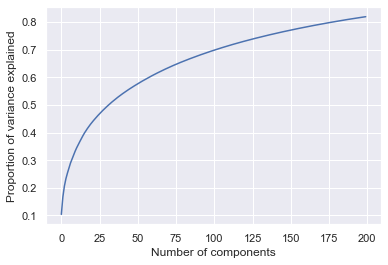

In [232]:
# Instantiate our StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train_tot_ss = ss.fit_transform(X_train_tot)

# Standardize X_test.
X_test_tot_ss = ss.transform(X_test_tot)

from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_train_pca = pca.fit(X_train_tot_ss)
plt.plot(np.cumsum(X_train_pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained")
plt.show()

In [233]:
X_train_pca = pca.transform(X_train_tot_ss) #we fit on a bove
X_test_pca = pca.transform(X_test_tot_ss)

In [234]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [235]:
lr_pca.score(X_train_pca, y_train), lr_pca.score(X_test_pca, y_test)

(0.7991468183434056, 0.7643923240938166)

## confusion_matrix

In [236]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

def scores_confusion_matrix(model, x,y,model_name):

    plot_confusion_matrix(model, x,y)
# Get predictions
    preds = model.predict(x)
# Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y, preds).ravel()
#accuracy
    accuracy = accuracy_score(y, preds)
    print(model_name,'accuracy:', accuracy)
#sensitivity (recall)
    recall = recall_score(y, preds)
    print(model_name,'recall:', recall)
#precision
    precision = precision_score(y, preds)
    print(model_name,'precision:', precision)
#Specificity
    spec = tn / (tn + fp)
    print(model_name,'Specificity:', spec)
    score_df = pd.DataFrame([[accuracy, recall, precision , spec]],

                           index =[model_name],

           columns = ['Accuracy', 'Recall','Precision','Specificity'])

    return score_df

LR with corr accuracy: 0.7505330490405118
LR with corr recall: 0.7831775700934579
LR with corr precision: 0.7802607076350093
LR with corr Specificity: 0.707196029776675
LR with total features accuracy: 0.753731343283582
LR with total features recall: 0.7906542056074767
LR with total features precision: 0.7804428044280443
LR with total features Specificity: 0.7047146401985112
LR with PCA accuracy: 0.7643923240938166
LR with PCA recall: 0.7962616822429907
LR with PCA precision: 0.79182156133829
LR with PCA Specificity: 0.7220843672456576


Accuracy    Recall  Precision  Specificity
LR with corr            0.750533  0.783178   0.780261     0.707196
LR with total features  0.753731  0.790654   0.780443     0.704715
LR with PCA             0.764392  0.796262   0.791822     0.722084

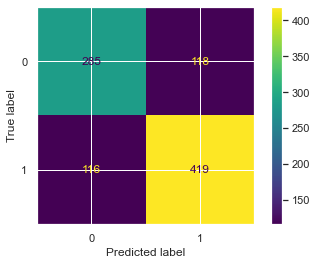

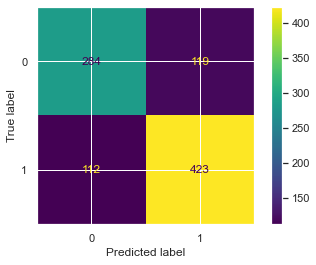

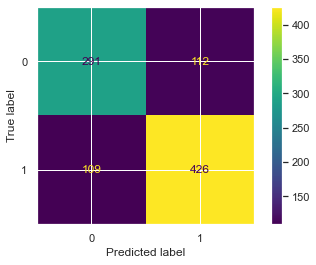

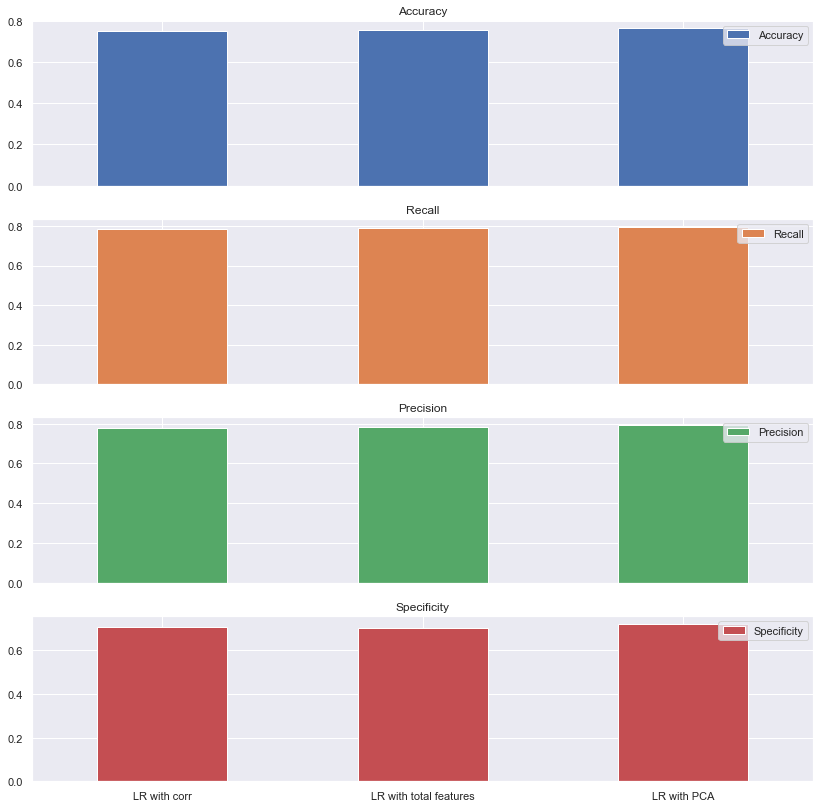

In [239]:
Lr_heat = scores_confusion_matrix(lr,X_test ,y_test,'LR with corr')
Lr_heat.head()
Lr_total_features = scores_confusion_matrix(lr_total_features ,X_test_tot,y_test,'LR with total features')
Lr_total_features.head()
Lr_PCA= scores_confusion_matrix(lr_pca, X_test_pca,y_test,'LR with PCA')
Lr_PCA.head()
score_df = [Lr_heat, Lr_total_features, Lr_PCA]

score_df= pd.concat(score_df)
axes = score_df.plot.bar(rot=0, subplots=True,figsize=(14,14))
score_df.head()

## Conclusion and Recommendations
**As a conclusion from what we have applied to the data set:**

- When we applied the logistic regression to the whole features we had an overfit which was expected because the amount of data we have is very little compared to the number of features.
- Using the heat map to reduce the number of features helped with reduce the overfit but still we have some amount of overfit.
- PCA did help with the overfit but not as much as the heat map.
- We need to get more train data to improve the model learning. The overall all accuracy for all models wasn’t that good.